Kim Thach 

**800793249** 

*ECGR 5090 - C01*

https://github.com/thachkse/Intro-to-ML/tree/main/HW_3

# Problem 1 - Logistic Regression


In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split.

Use the cancer dataset to build a logistic regression model & classify the type of cancer (Malignant vs. benign). 

* First, create a logistic regression that takes all 30 input features for classification. 

* Can you train a logistic regression over these number of features maps? 
                                
* Draw your training results, including loss and classification accuracy over iterations.

## Import Libraries

Import our common libraries, such as numpy, pandas and matplotlib. The dataset used in this HW comes from an sklearn library and will be imported also. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
df = load_breast_cancer()
datab = df.data
datab.shape

(569, 30)

In [3]:
data_in = pd.DataFrame(datab)
data_in.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Clean Data

It's important to clean/structure the data needed throughout this evaluation. The first step is so define your dataframe. Then extract the neccessary features, and outputs from the dataset.

In [4]:
b_labels = df.target
b_labels.shape

(569,)

In [5]:
labels = np.reshape(b_labels,(569,1))
finalb_data = np.concatenate([datab,labels],axis=1)
finalb_data.shape

(569, 31)

In [6]:
b_dataset = pd.DataFrame(finalb_data)
features = df.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features_labels = np.append(features,'label')
b_dataset.columns = features_labels
b_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
b_dataset['label'].replace(0,'Benign',inplace=True)
b_dataset['label'].replace(1,'Malignant',inplace=True)
b_dataset.tail()
data = pd.DataFrame.copy(b_dataset)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [9]:
b_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [10]:
# Define input and output variables
# Not sure why label went from binary to text earlier.
Y = b_dataset['label']
YBin = data['label']
YBin.replace('Benign',0,inplace=True)
YBin.replace('Malignant',1,inplace=True)
print(Y)
print(YBin)
X = b_dataset[features]
XBin = data[features]
# Binary seems to be neccessary for the sklearn.metrics library to compute recall and precision. So the another DF called YBin is defined by copying the original b_dataset.


0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: label, Length: 569, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


## Explore Data

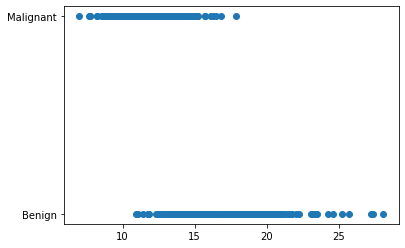

In [11]:
#Visualizing the first feature
plt.figure()
plt.scatter(b_dataset[features[0]],b_dataset['label'])
plt.show()

# It seems the first feature would be able to easily fit along a sigmoid function.

## Train & Test

In [12]:
# Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
x_trainbin, x_testbin, y_trainbin, y_testbin = train_test_split(XBin,YBin, test_size=0.20, random_state=42)

In [13]:
# Scale our data

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(x_train)
X_test = stdsc.transform(x_test)
X_TRbin = stdsc.fit_transform(x_trainbin)
X_TSTbin = stdsc.transform(x_testbin)
# Y is binary, so no need to edit.


In [14]:
# Import LogisticRegression
# Fit and train model on training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
#classifier.fit(X_train, y_train)
classifier.fit(X_TRbin, y_trainbin)

LogisticRegression(random_state=0)

In [15]:
Y_pred = classifier.predict(X_TSTbin)
print(Y_pred)
print(y_testbin)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: label, Length: 114, dtype: int64


In [16]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_testbin, Y_pred)
cnf_matrix


array([[41,  2],
       [ 1, 70]])

In [17]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_testbin,Y_pred))
print("Precision:",metrics.precision_score(y_testbin,Y_pred))
print("Recall:",metrics.recall_score(y_testbin,Y_pred))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


Text(0.5, 257.44, 'Predicted label')

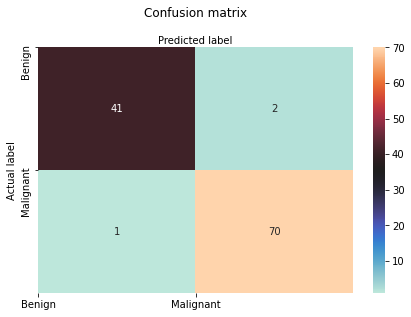

In [18]:
#Visualize

import seaborn as sns
class_names=['Benign','Malignant']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

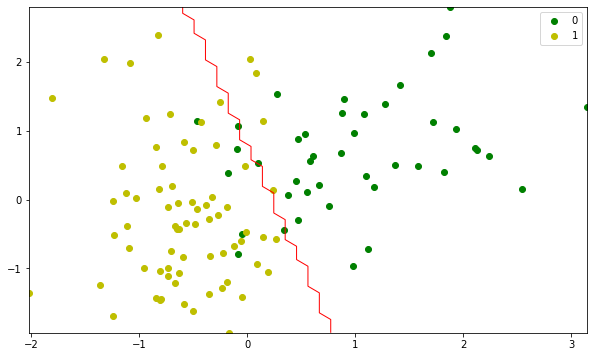

In [19]:
from sklearn.linear_model import LogisticRegression

# This plot on extracts 2 features and then runs it through the classifier. 
xdot, ydot = X_TSTbin[:,0:2], y_testbin
classifierx = LogisticRegression(random_state=0) 
classifierx.fit(X_TRbin[:,0:2], y_trainbin)


plt.figure(figsize = (10, 6))

plt.scatter(xdot[ydot == 0][:, 0], xdot[ydot == 0][:, 1], color = 'g', label = '0')
plt.scatter(xdot[ydot == 1][:, 0], xdot[ydot == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = xdot[:,0].min(), xdot[:,0].max(),
x2_min, x2_max = xdot[:,1].min(), xdot[:,1].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs = classifierx.predict(grid).reshape(xx1.shape)
#print(probs)
#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='red')


In [20]:
# sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)

from sklearn.metrics import log_loss

logloss = log_loss(y_testbin,Y_pred)
print(logloss)


0.9089291963122152


In [21]:
from sklearn.linear_model import SGDClassifier

X = X_TRbin
y = y_trainbin
print(X.shape)
print(y.shape)

iterations = 1000
loglossvec = np.zeros(iterations)

clf = SGDClassifier(loss="log", penalty="l2", max_iter=29)
clf.fit(X, y)
#print(y_testbin.shape)
ypred = clf.predict(X_TSTbin)
loglossx = log_loss(y_testbin,ypred)

print(loglossx)

(455, 30)
(455,)
0.9089221822996695


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [22]:
for i in range(iterations):
    if i != 0:
        clf = SGDClassifier(loss="log", penalty="l2", max_iter=i)
        clf.fit(X, y)
        #print(y_testbin.shape)
        ypred = clf.predict(X_TSTbin)
        loglossvec[i] = log_loss(y_testbin,ypred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

3.0297382696613813
0.0


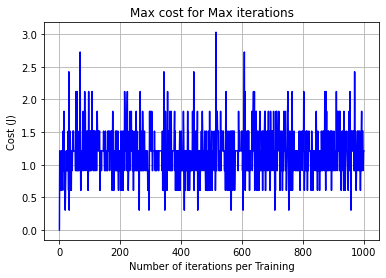

In [23]:


plt.figure()
plt.plot(range(1,iterations+1),loglossvec,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations per Training')
plt.ylabel('Cost (J)')
plt.title('Max cost for Max iterations')

maxloss = max(loglossvec)
minloss = min(loglossvec)
print(maxloss)
print(minloss)


## Conclusion

The logistic regression, achieved a very high accuracy, recall and precision initially. Is this because the dataset only offers 2 separate classes? I'm not quite sure if that's the reason.

Determining loss over iterations via logistic regression is more of an iterative & manual process. In an effort to forego any explicit model building a few different methods/functions were identified and used between **ln 26- 27** to determine the possible impact of iteratively trying to minimize loss with the gradient descent algorithm for a logisitic regression classifier. 

Using the SDGclassifier the user is able to define the # iterations and the "loss type" in other words the type of classifier to be used. In Ln 26, the max # of iterations was defined from 0 - 1000 in a step of 1. After fitting and predicting the data the log_loss function was used to determine the general loss from that iteration process (comparing the prediction results with the ytest results). The for loop repeated the process 1000x and stored all log_loss values from iterations. That data is plotted above in the "Max Cost for Max iterations" plot. No known alpha was identified throughout the process. In the beginning where a lower number of iterations were defined, warnings were given that it did not converge. Through some manual testing it seems that the a good number of iteration for this dataset is about 25.

The confusion matrix shows that overall this methodology used on this dataset does really well. There are very little false identifications. 

The 2D classification plot above is simply a representation of a the dataset using the first 2 features. The classification process, is then used again, to appropriately draw the boundaries needed for this classification.

The several features (30) didn't really seem to affect the accuracy of the logisitic regression model.

I believe it would be difficult to minimize the overall loss further. 

* Accuracy: 0.9736842105263158
* Precision: 0.9722222222222222
* Recall: 0.9859154929577465



# Problem 2 - PCA Feature Extraction

Repeat problem 1, but this time use the PCA feature extraction for your training. 

* Perform N number of independent training (N=1, …, K). 

* Identify the optimum number of K, principle components that achieve the highest classification accuracy. 

* Plot your classification accuracy, precision, and recall over a different number of Ks. 

* Explain and elaborate on your results.

## Re-define Data

Simplify the variables to be used, we'll redefine the Dataframe once again, using the original original cleaned dataframe.

In [24]:
from sklearn.preprocessing import StandardScaler 

# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']


# Standardizing the features 
x = StandardScaler().fit_transform(x) 

## PCA Processing

Here's the first attempt at PCA pre-processing with visualizations.

In [25]:
from sklearn.decomposition import PCA

pca=(PCA(n_components = 2))
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['principal component 1','principal component 2'])

In [26]:
finalDF = pd.concat([principalDF, b_dataset[['label']]], axis = 1)


In [27]:
print(finalDF)

     principal component 1  principal component 2      label
0                 9.192837               1.948583     Benign
1                 2.387802              -3.768172     Benign
2                 5.733896              -1.075174     Benign
3                 7.122953              10.275589     Benign
4                 3.935302              -1.948072     Benign
..                     ...                    ...        ...
564               6.439315              -3.576817     Benign
565               3.793382              -3.584048     Benign
566               1.256179              -1.902297     Benign
567              10.374794               1.672010     Benign
568              -5.475243              -0.670637  Malignant

[569 rows x 3 columns]


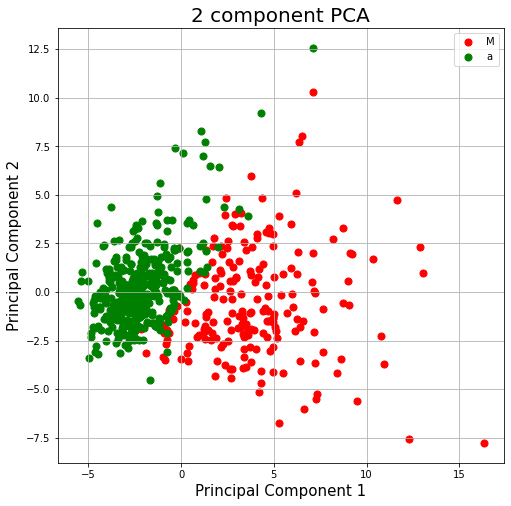

In [29]:
fig = plt.figure(figsize = (8,8)) 

ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
labels = ['Benign','Malignant'] 
colors = ['r', 'g','b'] 

for labels, color in zip(labels,colors): 
    indicesToKeep = finalDF['label'] == labels
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'] 
               , finalDF.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 
ax.legend(labels) 
ax.grid() 

In [30]:
y = finalDF['label']
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
fx = ['principal component 1','principal component 2']
x = finalDF[fx]
print(x)

     principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
..                     ...                    ...
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

#For some reason text didn't work

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [33]:
predy = classifier.predict(x_test)
predy[0:9]

array([1, 0, 0, 1, 1, 0, 0, 0, 1])

In [34]:
cnf_matrix = confusion_matrix(y_test,predy)
cnf_matrix

array([[42,  1],
       [ 0, 71]])

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0


Text(0.5, 384.16, 'Predicted label')

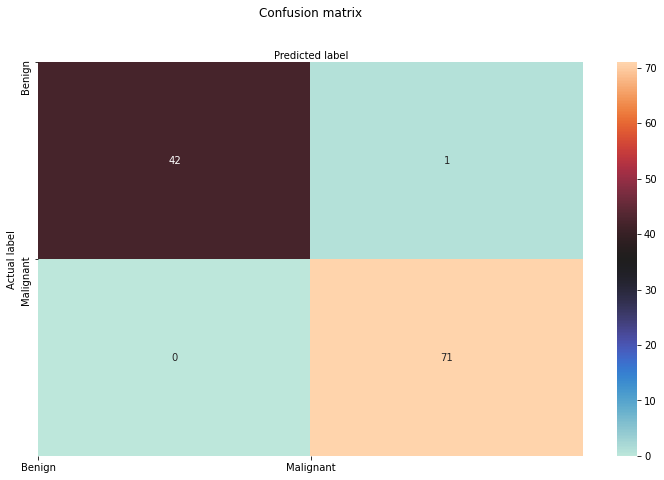

In [36]:
import seaborn as sns
class_names=['Benign','Malignant']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

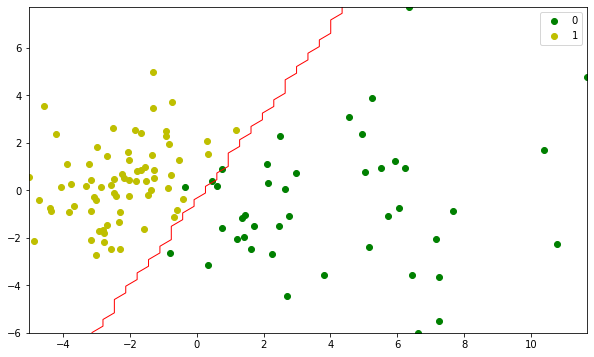

In [37]:
from sklearn.linear_model import LogisticRegression

xdot, ydot = x_test.values, y_test.values
#classifierx = LogisticRegression(random_s,tate=0) 
classifier.fit(x_train.values, y_train.values)


plt.figure(figsize = (10, 6))

plt.scatter(xdot[ydot == 0][:, 0], xdot[ydot == 0][:, 1], color = 'g', label = '0')
plt.scatter(xdot[ydot == 1][:, 0], xdot[ydot == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = xdot[:,0].min(), xdot[:,0].max(),
x2_min, x2_max = xdot[:,1].min(), xdot[:,1].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs = classifier.predict(grid).reshape(xx1.shape)

#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='red')

In [38]:

from sklearn.metrics import log_loss

logloss = log_loss(y_test,predy)
print(logloss)

0.3029787367749209


In [39]:
from sklearn.preprocessing import StandardScaler 

# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']
print(y)

# Standardizing the features 
x = StandardScaler().fit_transform(x) 

pca=(PCA(n_components = 3))
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['pc1','pc2','pc3'])
finalDF = pd.concat([principalDF, b_dataset[['label']]], axis = 1)
y = finalDF['label']
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
fx = ['pc1','pc2','pc3']
x = finalDF[fx]

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: label, Length: 569, dtype: object


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
predy = classifier.predict(x_test)
cnf_matrix = confusion_matrix(y_test,predy)
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))



Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0


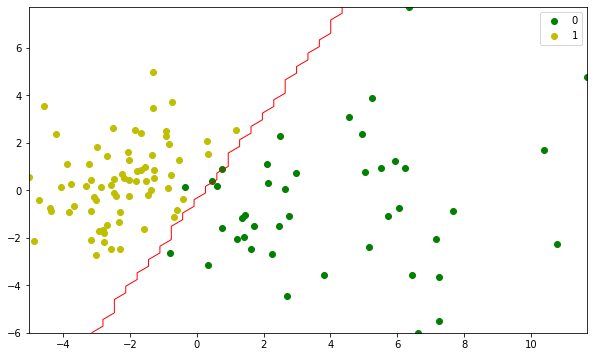

In [41]:
from sklearn.linear_model import LogisticRegression

xdot, ydot = x_test.values, y_test.values
xdot = xdot[:,0:2]

classifierx = LogisticRegression(random_state=0) 
xs = x_train.values[:,0:2]
classifierx.fit(xs, y_train.values)


plt.figure(figsize = (10, 6))

plt.scatter(xdot[ydot == 0][:, 0], xdot[ydot == 0][:, 1], color = 'g', label = '0')
plt.scatter(xdot[ydot == 1][:, 0], xdot[ydot == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = xdot[:,0].min(), xdot[:,0].max(),
x2_min, x2_max = xdot[:,1].min(), xdot[:,1].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs = classifierx.predict(grid).reshape(xx1.shape)

#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='red')

In [42]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test,predy)
print(logloss)

0.6059574735498409


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
0.9089291963122152


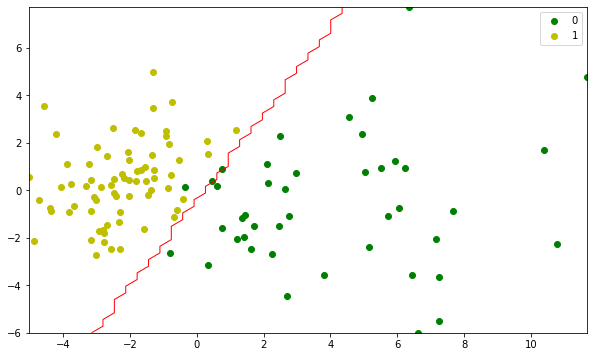

In [43]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']

# Standardizing the features 
x = StandardScaler().fit_transform(x) 

pca=(PCA(n_components = 4))
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents, columns = ['pc1','pc2','pc3','pc4'])
finalDF = pd.concat([principalDF, b_dataset[['label']]], axis = 1)
y = finalDF['label']
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
fx = ['pc1','pc2','pc3','pc4']
x = finalDF[fx]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
predy = classifier.predict(x_test)
cnf_matrix = confusion_matrix(y_test,predy)
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))

from sklearn.linear_model import LogisticRegression

xdot, ydot = x_test.values, y_test.values
xdot = xdot[:,0:2]

classifierx = LogisticRegression(random_state=0) 
xs = x_train.values[:,0:2]
classifierx.fit(xs, y_train.values)


plt.figure(figsize = (10, 6))

plt.scatter(xdot[ydot == 0][:, 0], xdot[ydot == 0][:, 1], color = 'g', label = '0')
plt.scatter(xdot[ydot == 1][:, 0], xdot[ydot == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = xdot[:,0].min(), xdot[:,0].max(),
x2_min, x2_max = xdot[:,1].min(), xdot[:,1].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs = classifierx.predict(grid).reshape(xx1.shape)

#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='red')

from sklearn.metrics import log_loss

logloss = log_loss(y_test,predy)
print(logloss)

## Number of Princial Components (k)

A after repeat processing of data using PCA and Logistic regression, an array was manually created below, with the following details

|k|Accuracy|Precision|Recall|Loss|
|-|--------|---------|------|----|

k(s) used in this example includes the following : 2, 3, 4. Values are also defined at 0. The data at k = 0 is from the original logistic regression training. 

In [44]:
#Manually write in values. 
b = np.array(np.mat('0,0.9736842,0.9722222222,0.98591549,0.908929;2,0.991228,0.986111,1.0,0.3029;3,0.98245,0.972602,1.0,0.6059574;4,0.973684,0.97222,0.98591549,0.90892919'))

print(b)

[[0.         0.9736842  0.97222222 0.98591549 0.908929  ]
 [2.         0.991228   0.986111   1.         0.3029    ]
 [3.         0.98245    0.972602   1.         0.6059574 ]
 [4.         0.973684   0.97222    0.98591549 0.90892919]]


Text(0, 0.5, 'Accuracy')

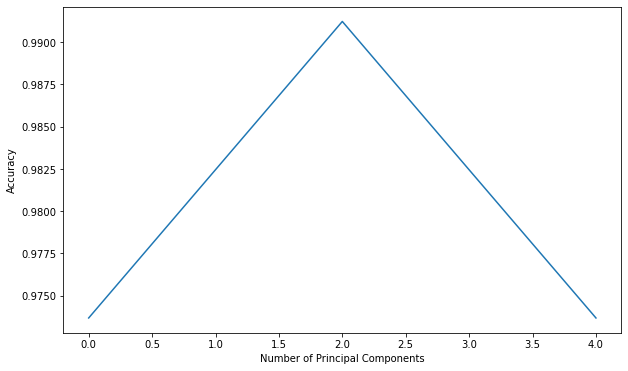

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(b[:,0],b[:,1])
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

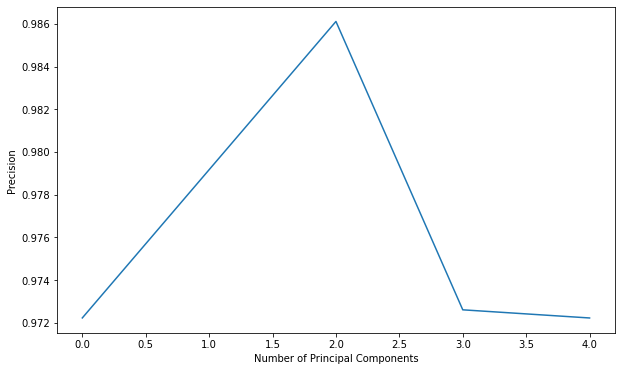

In [46]:
plt.figure(figsize = (10, 6))
plt.plot(b[:,0],b[:,2])
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

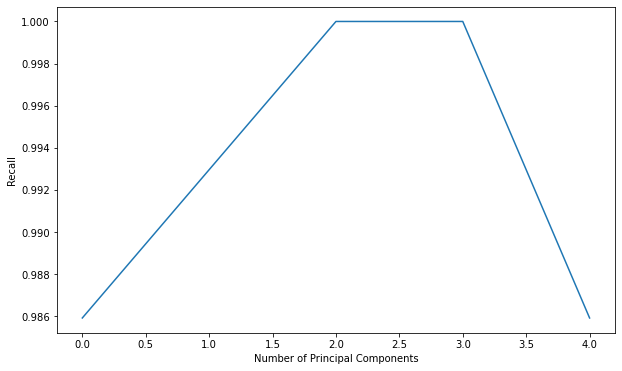

In [47]:
plt.figure(figsize = (10, 6))
plt.plot(b[:,0],b[:,3])
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')

Text(0, 0.5, 'loss')

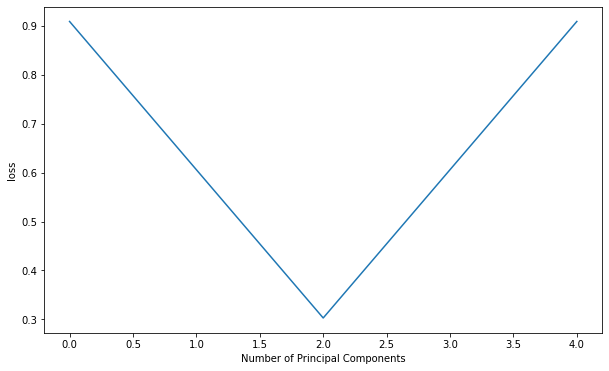

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(b[:,0],b[:,4])
plt.xlabel('Number of Principal Components')
plt.ylabel('loss')


## Conclusion

After reviwing the several plots above (Accuracy/Precision/Recall vs. # of Principal Components.) It seemed it was indeed possible to achieve to achieve an even higher accuracy using PCA. The best accuracy overall which also contained the minimum loss well below all other test/trials was determined with the only 2 principal components. It seems that the 2 principal components(pcs) are more fitting for this dataset and actually helped with providing exceedingly great accuracy results and minimum loss. Using 4 principal components presented the same / similar accuracy to the findings in just using the logistic regression method.


# Problem 3 - LDA & Bayes Gaussian Classifier

Repeat problem 2, but this time use the LDA feature extraction for your training. 

* For the classification, use the built-in Bays classifier for the classification. 

* Report your classification accuracy, precision, and recall. Explain and elaborate on your results.



In [49]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']

# Standardizing the features 
x = StandardScaler().fit_transform(x) 
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train,y_train)
X_test = lda.transform(x_test)


Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394


Text(0.5, 384.16, 'Predicted label')

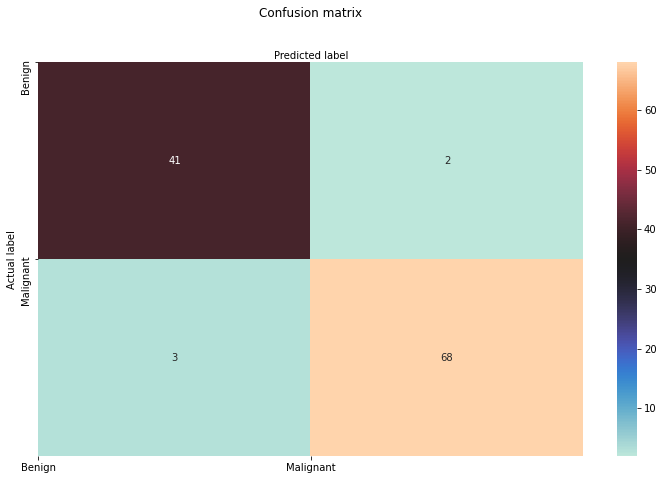

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
predy = classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test,predy)
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))

import seaborn as sns
class_names=['Benign','Malignant']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']

# Standardizing the features 
x = StandardScaler().fit_transform(x) 
print(x)
y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(x_train,y_train)
X_test = lda.transform(x_test)


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
predy = classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test,predy)
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))

import seaborn as sns
class_names=['Benign','Malignant']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

## Conclusion

It seems in LDA, that a user a can not define a number of classes that's more than number of classes -1 . In this case we only have 2 classes present in our dataset. Attempting a LDA with 1 defined component + using the Bayes classifier, did not surpass the PCA (#components = 2) + Logistic regression approach performed in Problem 2. This process, did not exceed the performance of just using a logistic regression, neither. It seems in this particular dataset the best classifier to use would be the logisitic regression.

# Problem 4 - LDA & Logistic Regression
Can you repeat problem 3? This time, replace the Bayes classifier with logistic regression. 

* Report your results (classification accuracy, precision, and recall). 
* Compare your results against problem 2 and 3.


Accuracy: 0.9473684210526315
Precision: 0.9710144927536232
Recall: 0.9436619718309859


Text(0.5, 384.16, 'Predicted label')

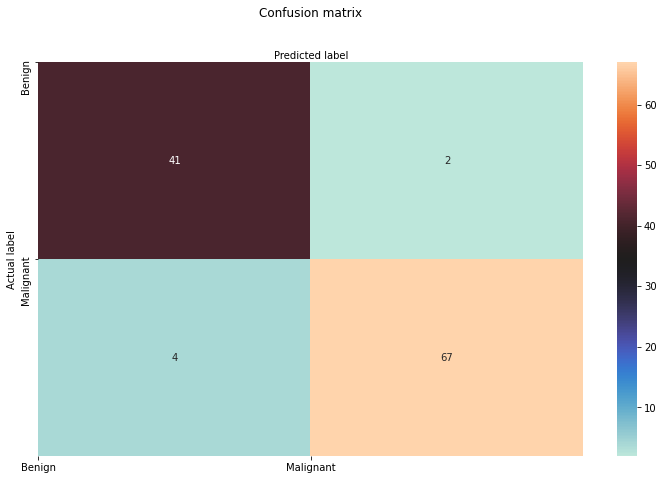

In [52]:
# Separating out the features 
x = b_dataset.loc[:, features].values 
# Separating out the target 
y = b_dataset['label']

# Standardizing the features 
x = StandardScaler().fit_transform(x) 

y.replace('Benign',0,inplace=True)
y.replace('Malignant',1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=42)




lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train,y_train)
X_test = lda.transform(x_test)


from sklearn.naive_bayes import GaussianNB
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train,y_train)
predy = classifier.predict(X_test)



cnf_matrix = confusion_matrix(y_test,predy)
print("Accuracy:",metrics.accuracy_score(y_test,predy))
print("Precision:",metrics.precision_score(y_test,predy))
print("Recall:",metrics.recall_score(y_test,predy))

import seaborn as sns
class_names=['Benign','Malignant']
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="icefire",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Conclusion

Compared to Problem 2 and 3. It seems this process / approach under-performed the other methodologies used prior. The accuracy and the Recall particularly suffered, which could affect patients adversely. Through this learning process it is evident, dimensionality reduction does help especially on binary classifiers like the logistic regression. Too many features can adversely affect modeling, by over/underfitting data. 

https://github.com/thachkse/Intro-to-ML/tree/main/HW_3